In [2]:
# Step 1: Load the dataset
import pandas as pd

# Replace with your actual file name
df = pd.read_csv("C:/Users/SALEEM/CALCE_CX2-34_prism_LCO_25C_0-100_0.5-0.5C_e_timeseries.csv")

print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Step 2: Data Cleaning

# 2.1 Remove duplicate rows
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# 2.2 Check for missing values
missing = df.isnull().sum()
print("\nMissing values per column:\n", missing)

# 2.3 Drop columns that are completely empty
empty_cols = missing[missing == df.shape[0]].index.tolist()
if empty_cols:
    df = df.drop(columns=empty_cols)
    print("\nDropped empty columns:", empty_cols)
else:
    print("\nNo completely empty columns to drop.")

# 2.4 Handle remaining missing values (if any)
# Option 1: Drop rows with any missing values
df = df.dropna()
print("\nShape after dropping rows with missing values:", df.shape)

# 2.5 Check data types
print("\nData types:\n", df.dtypes)

# 2.6 (Optional) Convert columns to correct types if needed
# Example:
# df['Cycle_Index'] = df['Cycle_Index'].astype(int)
# df['Voltage (V)'] = df['Voltage (V)'].astype(float)
# ... (repeat for other columns as needed)

print("\nData cleaning complete. Final shape:", df.shape)

Initial shape: (460700, 11)
Columns: ['Date_Time', 'Test_Time (s)', 'Cycle_Index', 'Current (A)', 'Voltage (V)', 'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)', 'Charge_Energy (Wh)', 'Discharge_Energy (Wh)', 'Environment_Temperature (C)', 'Cell_Temperature (C)']

First 5 rows:
             Date_Time  Test_Time (s)  Cycle_Index  Current (A)  Voltage (V)  \
0  2010-08-13 10:00:12         10.001          1.0        0.000        3.334   
1  2010-08-13 10:00:22         20.014          1.0        0.000        3.334   
2  2010-08-13 10:00:32         30.004          1.0        0.000        3.334   
3  2010-08-13 10:00:32         30.004          1.0        0.674        3.422   
4  2010-08-13 10:00:32         30.082          1.0        0.674        3.433   

   Charge_Capacity (Ah)  Discharge_Capacity (Ah)  Charge_Energy (Wh)  \
0                   0.0                      0.0                 0.0   
1                   0.0                      0.0                 0.0   
2                   0.

Descriptive Statistics:
       Test_Time (s)    Cycle_Index    Current (A)    Voltage (V)  \
count   4.606990e+05  460699.000000  460699.000000  460699.000000   
mean    8.773195e+06     761.472697      -0.078347       3.824389   
std     5.333684e+06     488.859667       0.954364       0.322567   
min     1.000100e+01       1.000000      -1.419000       0.304000   
25%     4.147937e+06     337.000000      -1.349000       3.608000   
50%     8.482169e+06     712.000000       0.675000       3.914000   
75%     1.327793e+07    1159.000000       0.675000       4.066000   
max     1.864203e+07    1735.000000       5.968000       4.215000   

       Charge_Capacity (Ah)  Discharge_Capacity (Ah)  Charge_Energy (Wh)  \
count         460699.000000             460699.00000       460699.000000   
mean               0.300273                  0.19272            1.183826   
std                0.334963                  0.32887            1.329151   
min                0.000000                  0.000

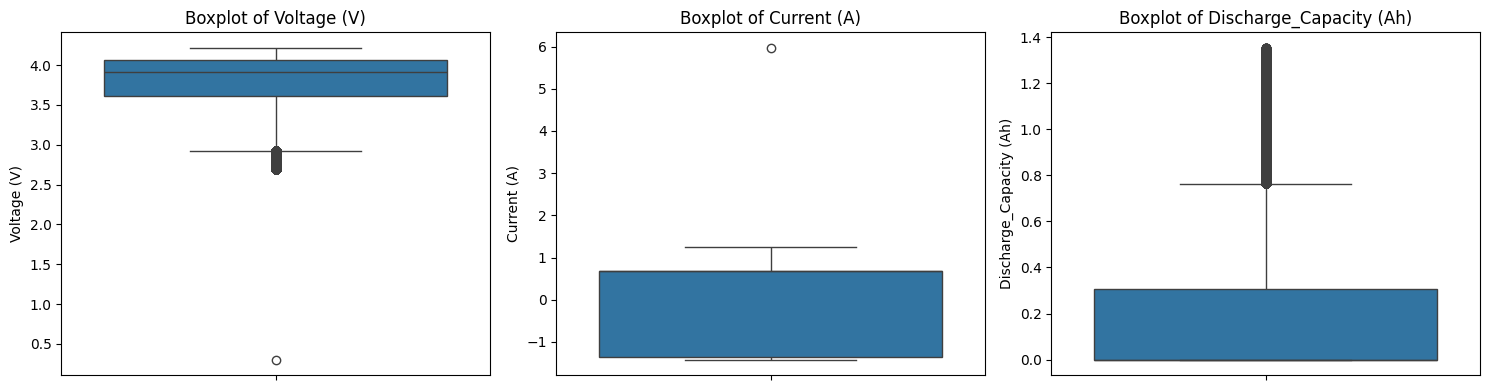

Removed 11183 outliers from Voltage (V)
Removed 0 outliers from Current (A)
Removed 54842 outliers from Discharge_Capacity (Ah)
Shape after outlier removal: (394674, 9)


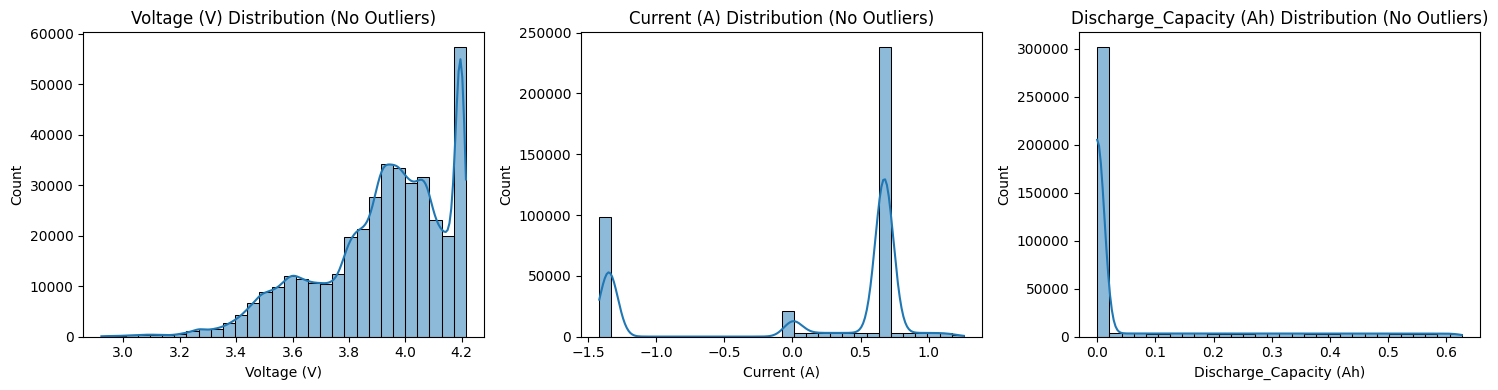

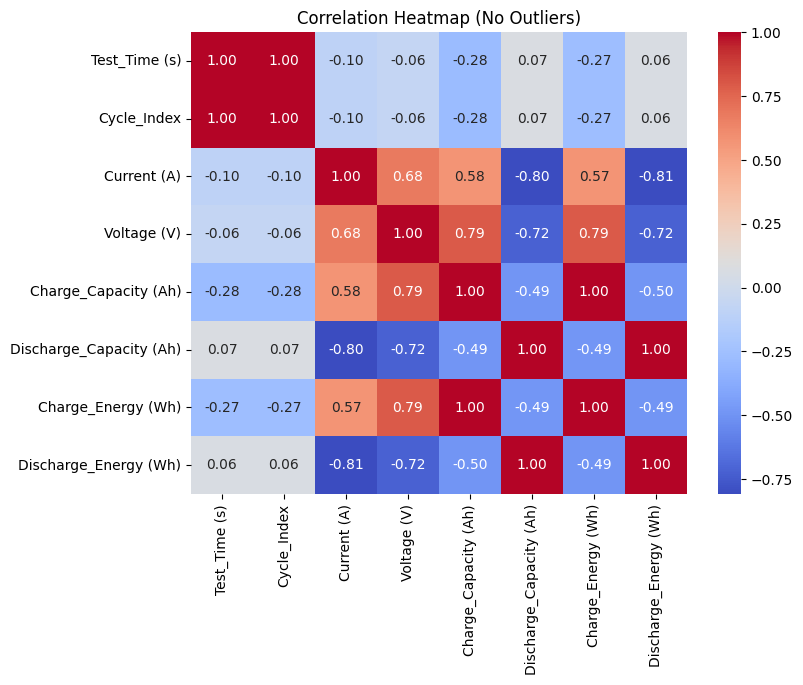

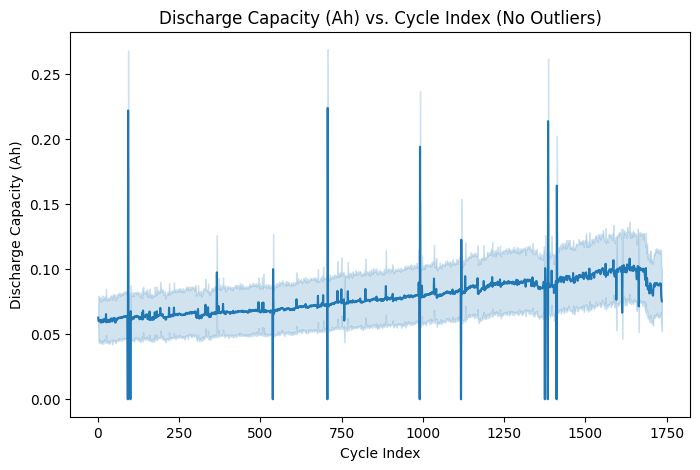

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual file name if needed)
df = pd.read_csv("C:/Users/SALEEM/CALCE_CX2-34_prism_LCO_25C_0-100_0.5-0.5C_e_timeseries.csv")

# Data cleaning
df = df.drop_duplicates()
df = df.drop(['Environment_Temperature (C)', 'Cell_Temperature (C)'], axis=1)
df = df.dropna()

# 1. Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# 2. Visualize outliers with boxplots
features = ['Voltage (V)', 'Current (A)', 'Discharge_Capacity (Ah)']

plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3. Remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in features:
    before = df.shape[0]
    df = remove_outliers_iqr(df, col)
    after = df.shape[0]
    print(f"Removed {before - after} outliers from {col}")

print("Shape after outlier removal:", df.shape)

# 4. Distribution plots after outlier removal
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution (No Outliers)')
plt.tight_layout()
plt.savefig('distribution_plots_no_outliers.png')
plt.show()

# 5. Correlation heatmap (numeric columns only)
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (No Outliers)')
plt.savefig('correlation_heatmap.png')
plt.show()

# 6. Discharge Capacity vs. Cycle Index (after outlier removal)
plt.figure(figsize=(8, 5))
sns.lineplot(x='Cycle_Index', y='Discharge_Capacity (Ah)', data=df)
plt.title('Discharge Capacity (Ah) vs. Cycle Index (No Outliers)')
plt.xlabel('Cycle Index')
plt.ylabel('Discharge Capacity (Ah)')
plt.savefig('discharge_capacity_vs_cycle_index.png')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Aggregate by Cycle_Index
agg_funcs = {
    'Voltage (V)': ['mean', 'std', 'min', 'max'],
    'Current (A)': ['mean', 'std', 'min', 'max'],
    'Discharge_Capacity (Ah)': 'max'  # SoH proxy per cycle
}
df_cycle = df.groupby('Cycle_Index').agg(agg_funcs)

# Flatten MultiIndex columns
df_cycle.columns = ['_'.join(col).strip() for col in df_cycle.columns.values]
df_cycle = df_cycle.reset_index()

# 2. Prepare features and target
X = df_cycle.drop(['Discharge_Capacity (Ah)_max'], axis=1)
y = df_cycle['Discharge_Capacity (Ah)_max']

# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Feature engineering and splitting complete. X_train shape:", X_train.shape)

Feature engineering and splitting complete. X_train shape: (1388, 9)


Linear Regression Performance:
MAE: 0.0057
MSE: 0.0002
R²: 0.9665


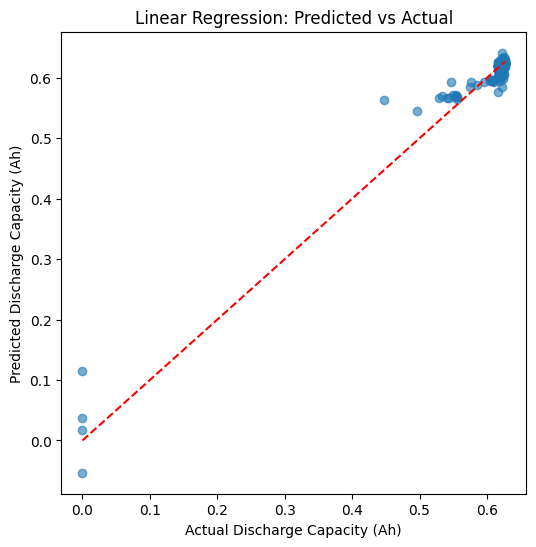

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Predict on test set
y_pred_lr = lr.predict(X_test)

# 3. Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

# 4. Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Discharge Capacity (Ah)')
plt.ylabel('Predicted Discharge Capacity (Ah)')
plt.title('Linear Regression: Predicted vs Actual')
plt.show()

Random Forest Performance:
MAE: 0.0036
MSE: 0.0003
R²: 0.9282


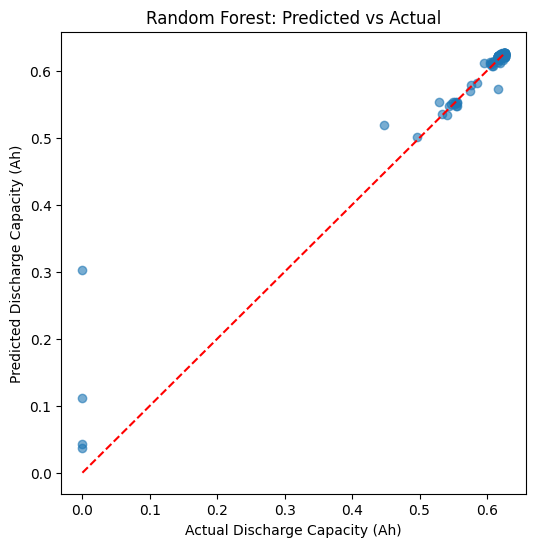

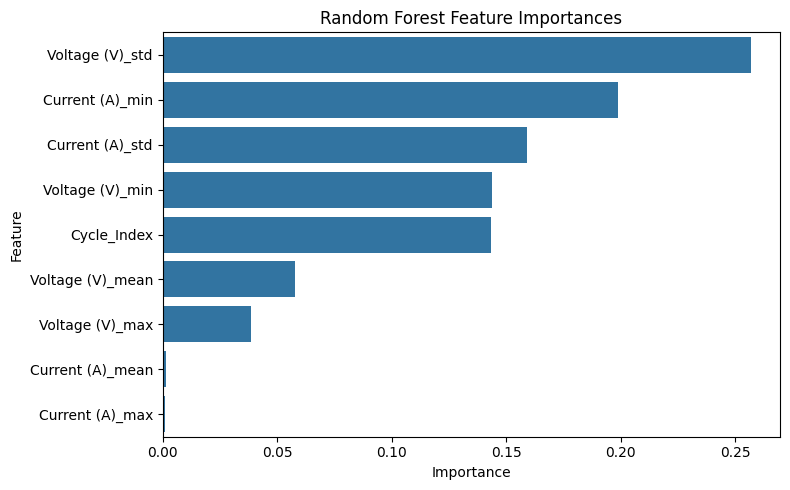

In [33]:
from sklearn.ensemble import RandomForestRegressor

# 1. Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. Predict on test set
y_pred_rf = rf.predict(X_test)

# 3. Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# 4. Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Discharge Capacity (Ah)')
plt.ylabel('Predicted Discharge Capacity (Ah)')
plt.title('Random Forest: Predicted vs Actual')
plt.savefig('rf_predicted_vs_actual.png')
plt.show()

# 5. Feature importance plot
import numpy as np

feature_names = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('rf_feature_importances.png')
plt.show()

In [7]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost Performance:
MAE: 0.0019200632776950983
MSE: 1.019994114629289e-05
R²: 0.9978308511098462


In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated MAE:", -grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validated MAE: 0.002030637079101585


In [11]:
from sklearn.model_selection import cross_val_score

best_xgb = grid_search.best_estimator_
cv_scores = cross_val_score(
    best_xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'
)
print("Cross-validated MAE (mean):", -cv_scores.mean())
print("Cross-validated MAE (std):", cv_scores.std())

Cross-validated MAE (mean): 0.002030637079101585
Cross-validated MAE (std): 0.00021545562933011385


In [12]:
# Retrain on full training set
best_xgb.fit(X_train, y_train)
y_pred_best = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Test MSE:", mean_squared_error(y_test, y_pred_best))
print("Test R²:", r2_score(y_test, y_pred_best))

Test MAE: 0.0018747318984022418
Test MSE: 9.960720184277528e-06
Test R²: 0.9978817245292919


In [13]:
!pip install shap


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


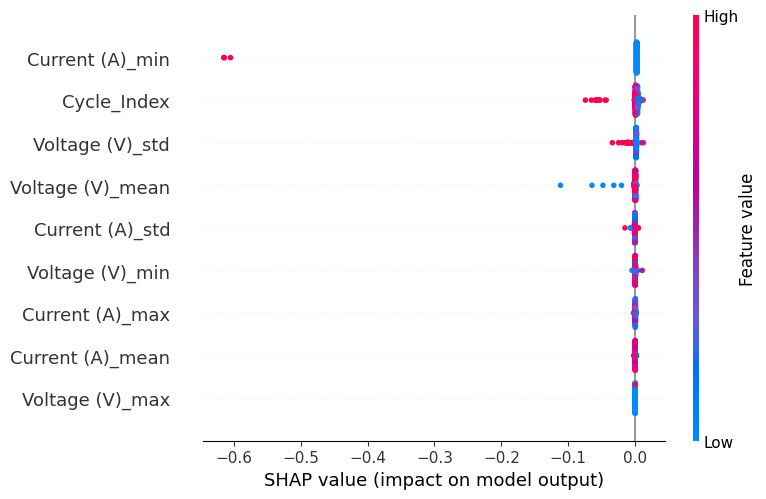

<Figure size 640x480 with 0 Axes>

In [35]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.savefig('shap_summary_plot.png')

#### 1: Save the Trained Model
##### Use joblib (recommended for XGBoost and scikit-learn models):

In [15]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, 'xgboost_battery_soh_model.pkl')

# Save the scaler as well (for preprocessing new data)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [16]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\SALEEM


In [18]:
import pandas as pd

# This assumes your 'df_cycle' DataFrame is still in memory from the previous steps.
# If not, you would need to rerun the aggregation code.

# The features 'X' are all columns in your cycle-aggregated data except the target.
X = df_cycle.drop(['Discharge_Capacity (Ah)_max'], axis=1)

# Get the list of feature names in the correct order
feature_names = X.columns.tolist()

print("The model requires the following 9 features in this exact order for prediction:")
print("-------------------------------------------------------------------------")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")


The model requires the following 9 features in this exact order for prediction:
-------------------------------------------------------------------------
1. Cycle_Index
2. Voltage (V)_mean
3. Voltage (V)_std
4. Voltage (V)_min
5. Voltage (V)_max
6. Current (A)_mean
7. Current (A)_std
8. Current (A)_min
9. Current (A)_max


In [19]:
import pandas as pd
import numpy as np

def generate_single_cycle_data(cycle_number, degradation_factor=0.0):
    """
    Generates a single, realistic charge/discharge cycle.
    
    Args:
        cycle_number (int): The index of the cycle to generate.
        degradation_factor (float): A factor from 0.0 to 1.0 to simulate aging.
    """
    # Parameters for the cycle simulation
    charge_current = 0.5
    discharge_current = -0.5 * (1 - degradation_factor * 0.1) # Discharge current weakens with age
    min_voltage = 3.0
    max_voltage = 4.2 * (1 - degradation_factor * 0.05) # Max voltage drops with age
    
    n_points_charge = 100
    n_points_discharge = 100
    
    # --- Create Phases ---
    # 1. Charging Phase
    charge_voltage = np.linspace(min_voltage, max_voltage, n_points_charge)
    charge_current_arr = np.full(n_points_charge, charge_current)
    
    # 2. Discharging Phase
    discharge_voltage = np.linspace(max_voltage, min_voltage, n_points_discharge)
    discharge_current_arr = np.full(n_points_discharge, discharge_current)
    
    # Combine phases
    voltage = np.concatenate([charge_voltage, discharge_voltage])
    current = np.concatenate([charge_current_arr, discharge_current_arr])
    
    # Create the DataFrame for this cycle
    cycle_df = pd.DataFrame({
        'Cycle_Index': cycle_number,
        'Voltage (V)': voltage,
        'Current (A)': current,
    })
    
    # Add some noise to make it more realistic
    cycle_df['Voltage (V)'] += np.random.normal(0, 0.01, size=len(cycle_df))
    cycle_df['Current (A)'] += np.random.normal(0, 0.005, size=len(cycle_df))
    
    return cycle_df

def create_synthetic_dataset(num_cycles=5):
    """
    Creates a full dataset with multiple, progressively degrading cycles.
    """
    all_cycles = []
    for i in range(1, num_cycles + 1):
        # Apply more degradation to later cycles
        degradation = (i-1) / num_cycles
        cycle_data = generate_single_cycle_data(i, degradation_factor=degradation)
        all_cycles.append(cycle_data)
        
    # Combine all cycles into one DataFrame
    final_df = pd.concat(all_cycles, ignore_index=True)
    
    # Save to CSV
    file_path = 'synthetic_battery_data.csv'
    final_df.to_csv(file_path, index=False)
    
    print(f"Successfully generated synthetic data with {num_cycles} cycles.")
    print(f"File saved as: {file_path}")

if __name__ == "__main__":
    create_synthetic_dataset()


Successfully generated synthetic data with 5 cycles.
File saved as: synthetic_battery_data.csv


## Predicted vs. Actual Capacity (Essential)

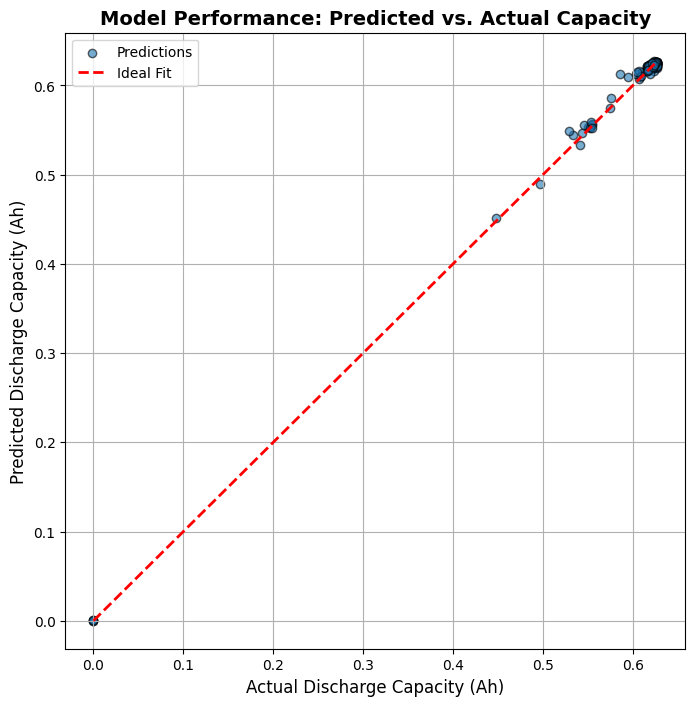

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_best are your test set true values and predictions
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.6, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Discharge Capacity (Ah)", fontsize=12)
plt.ylabel("Predicted Discharge Capacity (Ah)", fontsize=12)
plt.title("Model Performance: Predicted vs. Actual Capacity", fontsize=14, weight='bold')
plt.legend()
plt.grid(True)
plt.savefig('model_performance_plot.png')
plt.show()

## Degradation Curve Tracking 

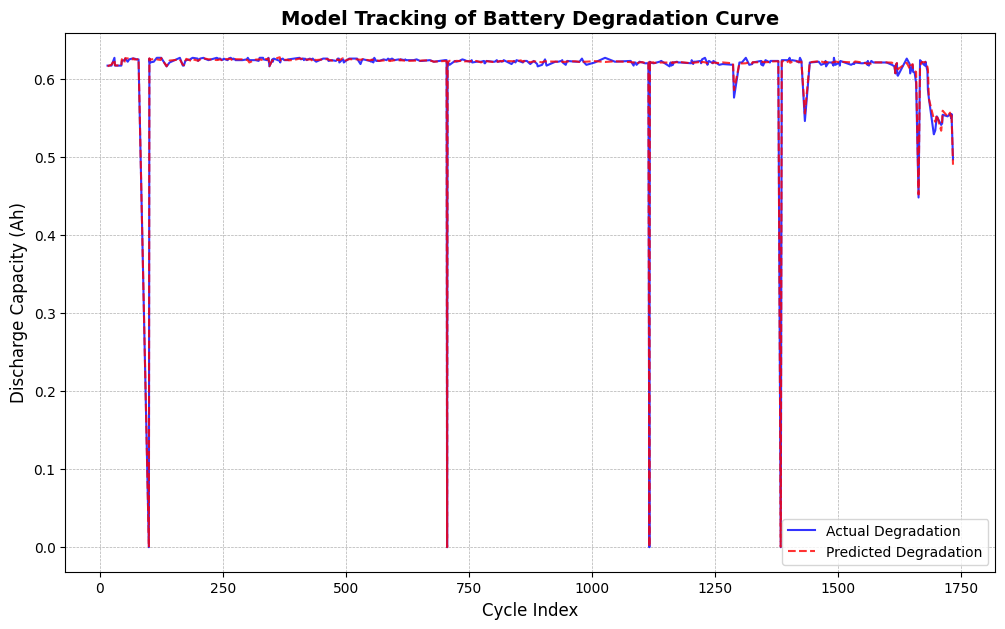

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get the cycle index from your original X_test (before scaling)
# The scaler only works on the feature columns, not the Cycle_Index itself
# We need to get the original cycle numbers for the test set.
df_cycle_test = df_cycle.loc[y_test.index]

# 2. Create a results DataFrame
results_df = pd.DataFrame({
    'Cycle_Index': df_cycle_test['Cycle_Index'],
    'Actual_Capacity': y_test,
    'Predicted_Capacity': y_pred_best
}).sort_values('Cycle_Index')

# 3. Plot the results
plt.figure(figsize=(12, 7))
plt.plot(results_df['Cycle_Index'], results_df['Actual_Capacity'], label='Actual Degradation', color='blue', alpha=0.8)
plt.plot(results_df['Cycle_Index'], results_df['Predicted_Capacity'], 'r--', label='Predicted Degradation', alpha=0.8)
plt.xlabel("Cycle Index", fontsize=12)
plt.ylabel("Discharge Capacity (Ah)", fontsize=12)
plt.title("Model Tracking of Battery Degradation Curve", fontsize=14, weight='bold')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('battery_degradation_curve.png')
plt.show()

## SHAP Dependence Plot